<table>
<tr>
<td width=15%><img src="https://www.nitrkl.ac.in/assets/images/logo.png"></img></td>
<td><center><h1>National Institute of Technology
Rourkela, Odisha, India, 769008</h1><h2>Department of Computer Science Engineering</h2></center></td>
</tr>
<tr><td colspan=2><center><h3>SUMMER INTERNSHIP cum TRAINNING PROGRAMME</h3></br>
            <b>(Theme: Artificial Intelligence and Data Science)</b></center></td></tr>
</table>

In [1]:
### lINEAR REGRESSION
import numpy as np
import warnings
warnings.filterwarnings("ignore")
X = 2* np.random.rand(100,1)
y = 4 + 3* X + np.random.randn(100,1)

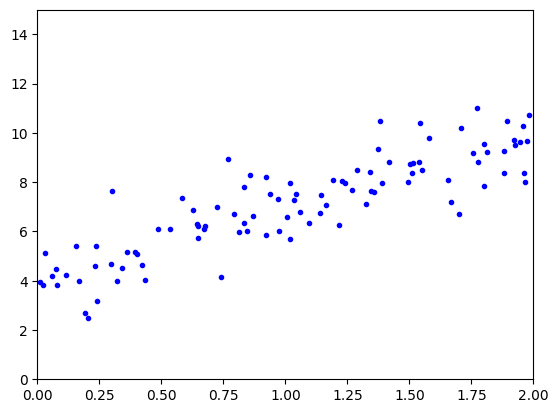

In [2]:
import matplotlib.pyplot as plt
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [3]:
X_b = np.c_[np.ones((100,1)),X]
print(X_b)

[[1.         1.80252333]
 [1.         1.75464889]
 [1.         0.53453818]
 [1.         1.77619424]
 [1.         0.11482247]
 [1.         0.92281785]
 [1.         1.14479746]
 [1.         1.89226074]
 [1.         1.23865581]
 [1.         0.97245567]
 [1.         0.67776735]
 [1.         1.95938879]
 [1.         0.7261614 ]
 [1.         0.36292661]
 [1.         1.22937271]
 [1.         1.21750871]
 [1.         0.19307857]
 [1.         0.05958521]
 [1.         1.29057352]
 [1.         0.92289355]
 [1.         1.34706764]
 [1.         1.97339922]
 [1.         1.1934588 ]
 [1.         0.79304599]
 [1.         1.88240586]
 [1.         1.80163259]
 [1.         1.32632525]
 [1.         1.37336795]
 [1.         1.70148053]
 [1.         1.49518528]
 [1.         1.94423785]
 [1.         0.2975725 ]
 [1.         1.55197535]
 [1.         0.64976776]
 [1.         0.32292756]
 [1.         1.50899254]
 [1.         0.0208325 ]
 [1.         0.87015107]
 [1.         1.09667991]
 [1.         0.00995273]


In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.08228539],
       [2.90232459]])

In [5]:
## predictions
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.08228539],
       [9.88693457]])

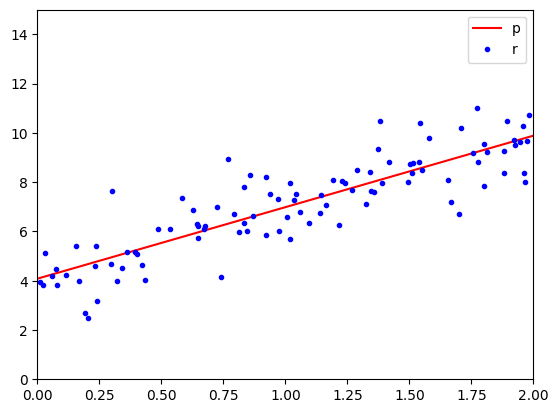

In [6]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.legend("predictions")


In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.08228539],
       [9.88693457]])

In [8]:
# linearregression class is based on scipy.linalg.lstsq(), the name stands for "least square"
#theta_best_svd: The best-fit parameters (intercept and slope) computed using the least squares method.
#residuals: The sum of the residuals (differences between the observed and predicted values). 
#This is useful for assessing the fit quality.
#rank: The effective rank of the matrix X_b. This indicates the number of linearly independent columns in X_b.
#singular values (s): The singular values of X_b, which provide insight into the condition number and stability of the solution.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd
#By setting rcond to a small value, you make the solution more robust against numerical issues, especially when dealing with nearly singular or ill-conditioned matrices.

array([[4.08228539],
       [2.90232459]])

In [9]:
from sklearn import datasets

In [10]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [11]:
X = iris["data"][:,3:] # petal_width

In [12]:
y = (iris["target"]==2).astype(int)# 1 if iris viginica, else 0

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

Text(0, 0.5, 'Proabability')

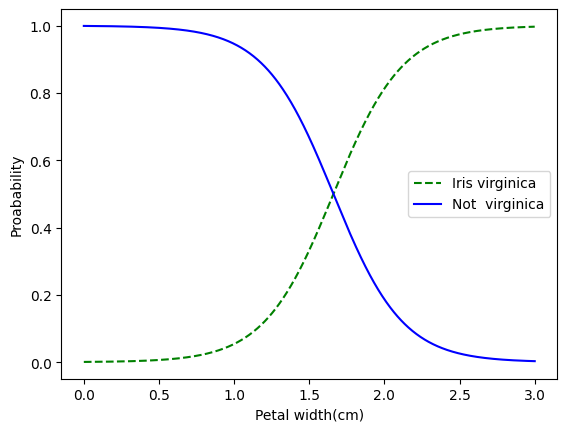

In [14]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g--", label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b-", label = "Not  virginica")
plt.legend()
plt.xlabel('Petal width(cm)')
plt.ylabel('Proabability')

(2.9, 7.0, 0.8, 2.7)

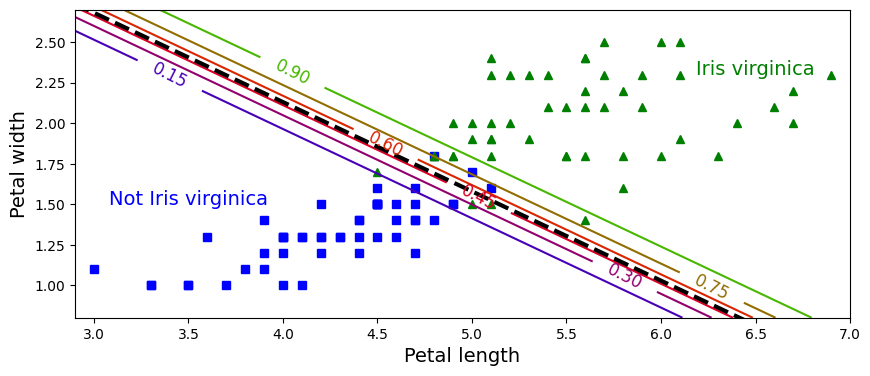

In [15]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42) # higher C, less model is regularized
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

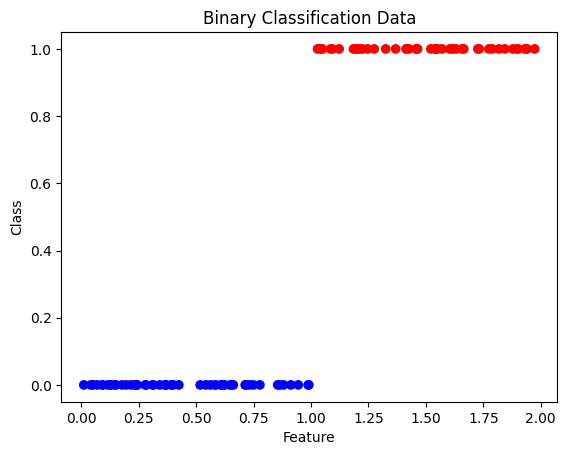

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Create a simple dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (X > 1).astype(int).ravel()  # Binary target: 1 if X > 1 else 0

# Plot the data
plt.scatter(X, y, c=y, cmap='bwr')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.title('Binary Classification Data')
plt.show()


In [17]:
# Add x0 = 1 to each instance to include the intercept term
X_b = np.c_[np.ones((100, 1)), X]  # Add bias term (x0 = 1)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_b, y)

# Print the model parameters
print("Theta best (intercept and coefficient):", lin_reg.intercept_, lin_reg.coef_)


Theta best (intercept and coefficient): -0.22582912938928634 [0.        0.7399592]


In [18]:
# Predict continuous values
y_pred_continuous = lin_reg.predict(X_b)

# Apply a threshold to convert to binary class labels
threshold = 0.5
y_pred = (y_pred_continuous >= threshold).astype(int)

# Print accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.98


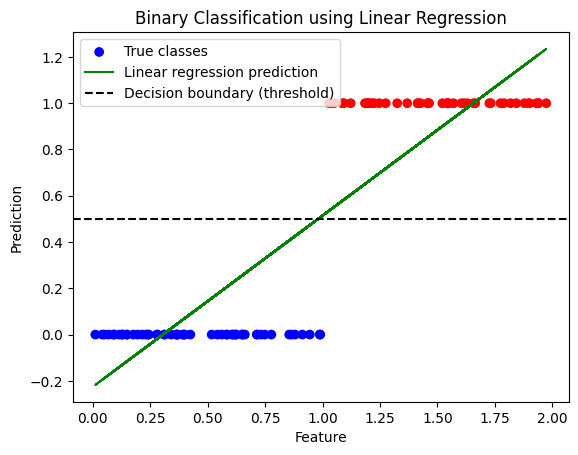

In [19]:
# Plot the data and the decision boundary
plt.scatter(X, y, c=y, cmap='bwr', label='True classes')
plt.plot(X, y_pred_continuous, 'g-', label='Linear regression prediction')
plt.axhline(y=threshold, color='k', linestyle='--', label='Decision boundary (threshold)')
plt.xlabel('Feature')
plt.ylabel('Prediction')
plt.title('Binary Classification using Linear Regression')
plt.legend()
plt.show()


In [20]:
from sklearn.datasets import make_blobs

In [21]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [22]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [23]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

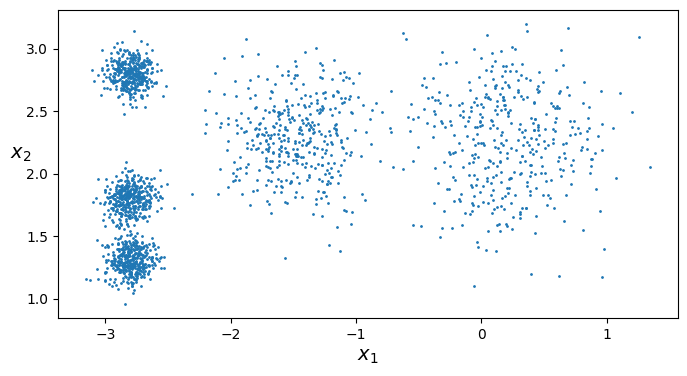

In [24]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [27]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [28]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [29]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [30]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

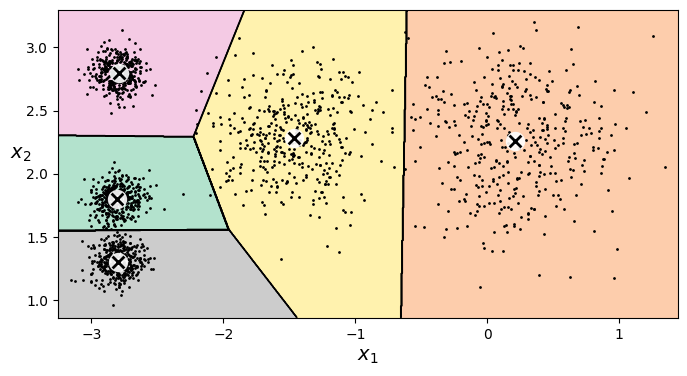

In [31]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [32]:
kmeans.transform(X_new)
#Rather than arbitrarily choosing the closest cluster for each instance, which is called hard clustering, it might be better measure the distance of each instance to all 5 centroids. This is what the transform() method does:
#You can verify that this is indeed the Euclidian distance between each instance and each centroid:

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [33]:
#The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:

#First initialize k centroids randomly: k distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
#Repeat until convergence (i.e., until the centroids stop moving):
#Assign each instance to the closest centroid.
#Update the centroids to be the mean of the instances that are assigned to them.
#The KMeans class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set init="random", n_init=1and algorithm="full". These hyperparameters will be explained below.

#Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

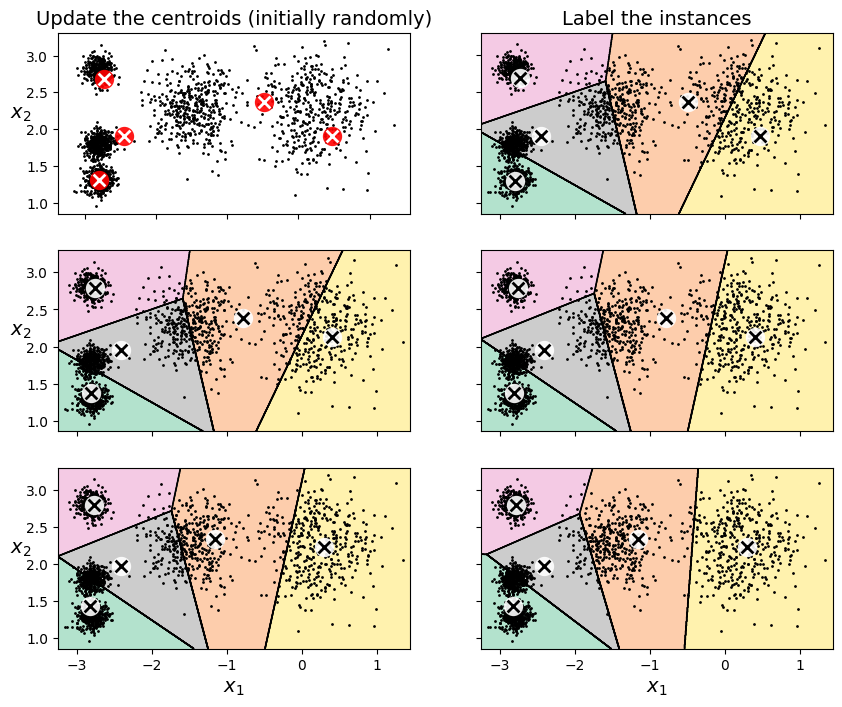

In [34]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [35]:
#In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

#However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

In [36]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

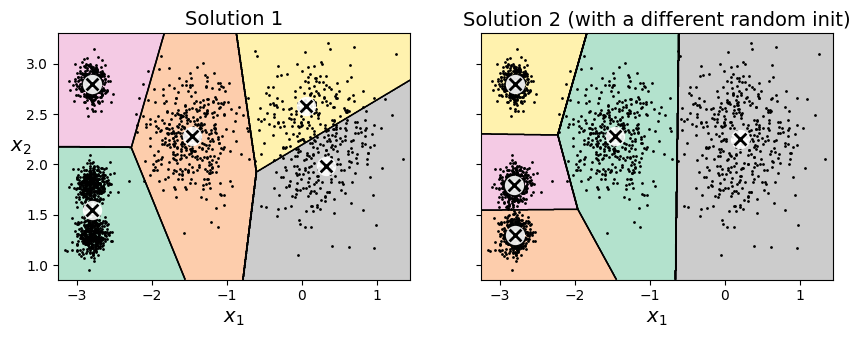

In [37]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [38]:
#To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the inertia metric:

In [39]:
kmeans.inertia_

211.59853725816836

In [40]:
#As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

In [41]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [42]:
#The score() method returns the negative inertia. Why negative? Well, it is because a predictor's score() method must always respect the "greater is better" rule.

In [43]:
kmeans.score(X)

-211.59853725816834

In [44]:
#So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure:

In [45]:
kmeans_rnd_init1.inertia_

219.43539442771393

In [46]:
kmeans_rnd_init2.inertia_

211.59853725816836

In [47]:
#As you can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.

In [48]:
#When you set the n_init hyperparameter, Scikit-Learn runs the original algorithm n_init times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets n_init=10.

In [49]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, n_init=10, random_state=2)

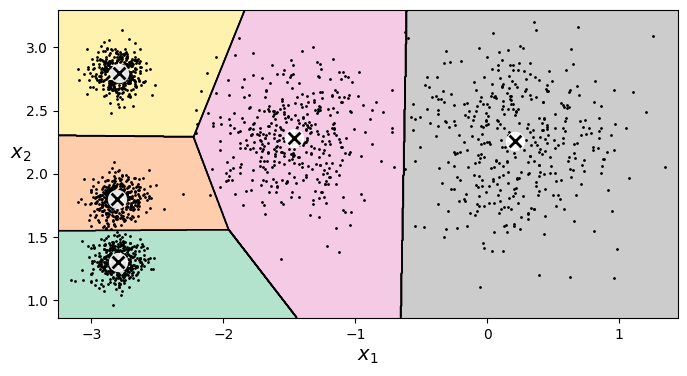

In [50]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [51]:
"""Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a [2006 paper](https://goo.gl/eNUPw6) by David Arthur and Sergei Vassilvitskii:
* Take one centroid $c_1$, chosen uniformly at random from the dataset.
* Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
* Repeat the previous step until all $k$ centroids have been chosen.
"""

'Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a [2006 paper](https://goo.gl/eNUPw6) by David Arthur and Sergei Vassilvitskii:\n* Take one centroid $c_1$, chosen uniformly at random from the dataset.\n* Take a new center $c_i$, choosing an instance $\\mathbf{x}_i$ with probability: $D(\\mathbf{x}_i)^2$ / $\\sum\\limits_{j=1}^{m}{D(\\mathbf{x}_j)}^2$ where $D(\\mathbf{x}_i)$ is the distance between the instance $\\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.\n* Repeat the previous step until all $k$ centroids have been chosen.\n'

In [52]:
#The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce `n_init` considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

In [53]:
KMeans()

KMeans()

In [54]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.59853725816836

In [55]:
#The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this [2003 paper](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) by Charles Elkan for more details).

In [56]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

200 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [57]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

KeyboardInterrupt: 

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

In [ ]:
minibatch_kmeans.inertia_

In [ ]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [ ]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [ ]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [ ]:
best_kmeans.score(X)

In [ ]:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

In [ ]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

In [ ]:
from timeit import timeit

In [ ]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Create and train the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions with the Decision Tree model
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Create and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42,max_features=3)
rf_clf.fit(X_train, y_train)

# Make predictions with the Random Forest model
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Compare the models
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


In [ ]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# Generate a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3,
                           n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# Print the class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Apply SMOTE to generate synthetic samples
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10,500], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid,cv=5,scoring = 'neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train,y_train)
grid_search.best_params_
grid_search.best_estimator_
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
final_predictions = final_model.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
